In [ ]:
1.Select

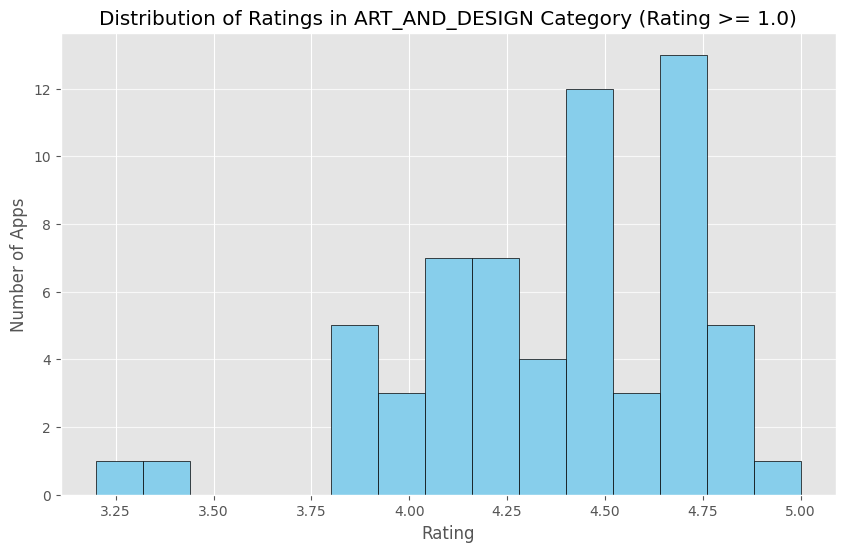

interactive(children=(Dropdown(description='Category:', options=('ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUT…

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, FloatSlider

data_path = 'googleplaystore.csv'  
data = pd.read_csv(data_path)

# Ensure 'Rating' is numeric and drop rows with NaN in 'Category' or 'Rating'
data = data.dropna(subset=['Rating', 'Category'])

# Function to plot based on selected category and minimum rating
def plot_selected_category_and_rating(category, min_rating):
    # Filter the data based on the selection
    filtered_data = data[(data['Category'] == category) & (data['Rating'] >= min_rating)]
    
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_data['Rating'], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Ratings in {category} Category (Rating >= {min_rating})')
    plt.xlabel('Rating')
    plt.ylabel('Number of Apps')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Create dropdown for selecting category
category_dropdown = Dropdown(options=data['Category'].unique().tolist(), description='Category:')

# Create a slider for selecting the minimum rating
min_rating_slider = FloatSlider(value=data['Rating'].min(), min=data['Rating'].min(), max=data['Rating'].max(), step=0.1, description='Min Rating:')

# Display the interactive plot
interact(plot_selected_category_and_rating, category=category_dropdown, min_rating=min_rating_slider);


In [ ]:
2.Explore: 

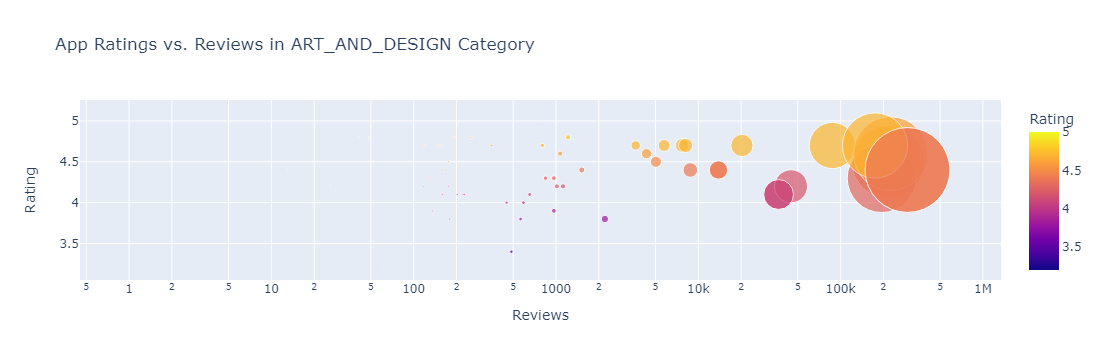

In [80]:
import pandas as pd
import plotly.express as px

data_path = 'googleplaystore.csv'  
data = pd.read_csv(data_path)

# Convert 'Reviews' to numeric for plotting
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data.dropna(subset=['Reviews', 'Rating'], inplace=True)  

# Create an interactive scatter plot
def interactive_exploration(category):
    filtered_data = data[data['Category'] == category]
    
    fig = px.scatter(filtered_data, x='Reviews', y='Rating',
                     size='Reviews', color='Rating',
                     hover_name='App', log_x=True, size_max=60,
                     title=f'App Ratings vs. Reviews in {category} Category')
    
    fig.update_layout(transition_duration=500)
    fig.show()

categories = data['Category'].unique().tolist()
interactive_exploration('ART_AND_DESIGN')  # Example category, replace or make interactive as needed


In [ ]:
3.Reconfigure

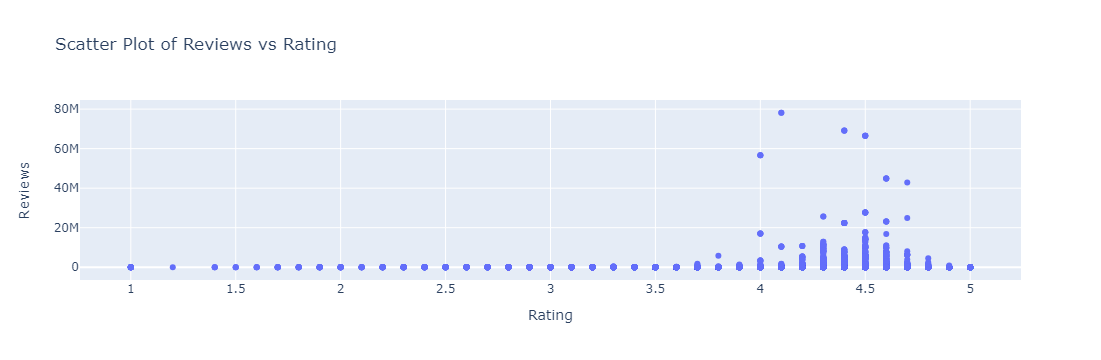

interactive(children=(Dropdown(description='X-Axis:', options=('Rating', 'Reviews'), value='Rating'), Dropdown…

In [82]:
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import interact, Dropdown, Select


data_path = 'googleplaystore.csv'  
data = pd.read_csv(data_path)

# Preprocess the data (e.g., convert 'Reviews' to numeric and handle NaN values)
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data.dropna(subset=['Rating', 'Reviews'], inplace=True)

# Define the function to update the plot
def update_plot(x_axis, y_axis, plot_type):
    filtered_data = data[[x_axis, y_axis]].dropna()
    
    if plot_type == 'Scatter':
        fig = go.Figure(data=[go.Scatter(x=filtered_data[x_axis], y=filtered_data[y_axis], mode='markers')])
    elif plot_type == 'Line':
        fig = go.Figure(data=[go.Line(x=filtered_data[x_axis], y=filtered_data[y_axis])])
    else:  # Default to scatter if an unexpected plot type is selected
        fig = go.Figure(data=[go.Scatter(x=filtered_data[x_axis], y=filtered_data[y_axis], mode='markers')])
    
    fig.update_layout(title=f'{plot_type} Plot of {y_axis} vs {x_axis}',
                      xaxis_title=x_axis,
                      yaxis_title=y_axis)
    fig.show()

# Widgets for interactivity
x_axis_dropdown = Dropdown(options=['Rating', 'Reviews'], value='Rating', description='X-Axis:')
y_axis_dropdown = Dropdown(options=['Rating', 'Reviews'], value='Reviews', description='Y-Axis:')
plot_type_select = Select(options=['Scatter', 'Line'], value='Scatter', description='Plot Type:')

# Display interactive plot
interact(update_plot, x_axis=x_axis_dropdown, y_axis=y_axis_dropdown, plot_type=plot_type_select);


In [ ]:
4.Encode

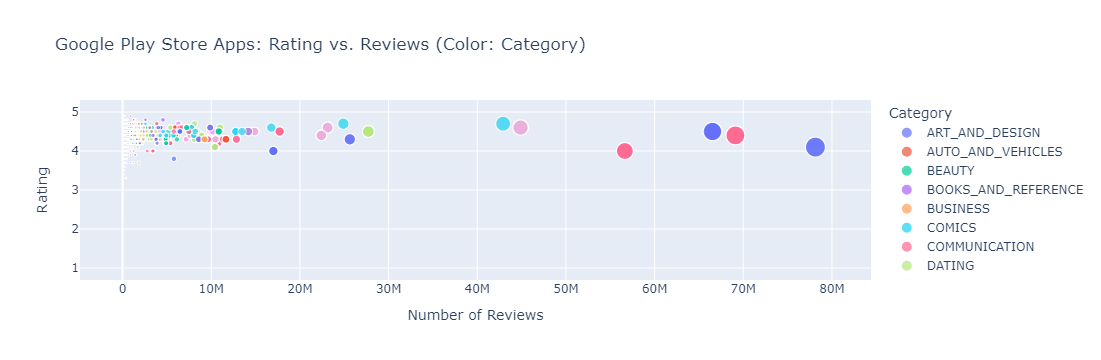

interactive(children=(Select(description='Color Encode:', options=('Category', 'Rating'), value='Category'), O…

In [84]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, Select


data_path = 'googleplaystore.csv'  
data = pd.read_csv(data_path)

# Convert 'Reviews' to numeric and drop rows with any NaN in 'Rating' or 'Reviews'
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data.dropna(subset=['Rating', 'Reviews'], inplace=True)

# Additionally, ensure categories are suitable for encoding, potentially convert numeric columns to categories if needed
# For demonstration, let's assume 'Category' is already suitable and 'Rating' can be a category for encoding

# Function to dynamically update the plot based on the selected attribute for color encoding
def update_plot(color_encode):
    fig = px.scatter(data, x='Reviews', y='Rating',
                     color=color_encode,  # Dynamically encode this attribute as color
                     hover_name='App', size='Reviews',
                     title=f'Google Play Store Apps: Rating vs. Reviews (Color: {color_encode})',
                     labels={'Reviews': 'Number of Reviews', 'Rating': 'Rating'})
    
    fig.show()

# Interactive widget for choosing the attribute to encode as color
color_encode_select = Select(
    options=['Category', 'Rating'],  # Assuming these are categorical; add more options as suitable
    value='Category',
    description='Color Encode:',
)

# Display the interactive plot
interact(update_plot, color_encode=color_encode_select);


In [ ]:
5.Abstract

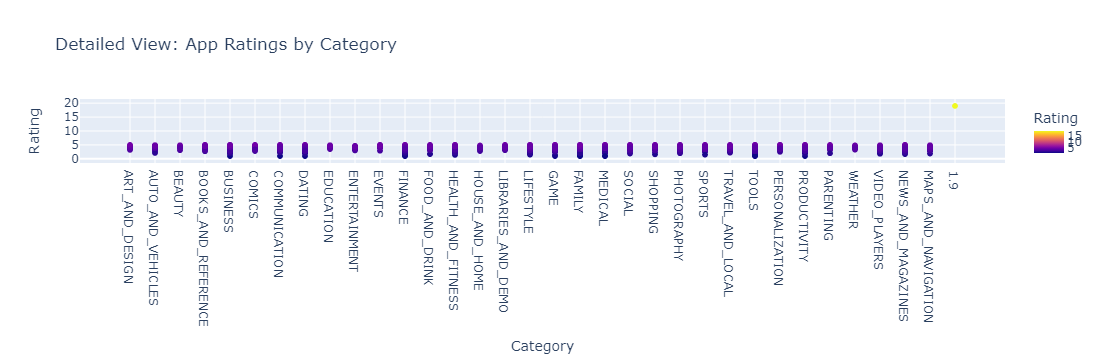

interactive(children=(Dropdown(description='View:', options=('Detailed', 'Abstracted'), value='Detailed'), Out…

In [86]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import interact, Dropdown

data_path = 'googleplaystore.csv'  
data = pd.read_csv(data_path)

# Convert 'Reviews' to numeric and clean up as necessary
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data.dropna(subset=['Rating'], inplace=True)

# Prepare aggregated data for the abstracted view
data_abstracted = data.groupby('Category')['Rating'].mean().reset_index()

# Function to update the plot based on the detail level
def update_plot(detail_level):
    if detail_level == 'Detailed':
        fig = px.scatter(data, x='Category', y='Rating', color='Rating',
                         title="Detailed View: App Ratings by Category")
    else:  # Abstracted view
        fig = go.Figure(data=[go.Bar(x=data_abstracted['Category'], y=data_abstracted['Rating'])],
                        layout_title_text="Abstracted View: Average Rating by Category")
        fig.update_layout(xaxis_tickangle=-45)  # Improve readability of category labels

    fig.show()

# Dropdown widget for selecting the detail level
detail_level_dropdown = Dropdown(options=['Detailed', 'Abstracted'], value='Detailed', description='View:')

# Display the interactive plot
interact(update_plot, detail_level=detail_level_dropdown);


In [ ]:
6.Elaborate 

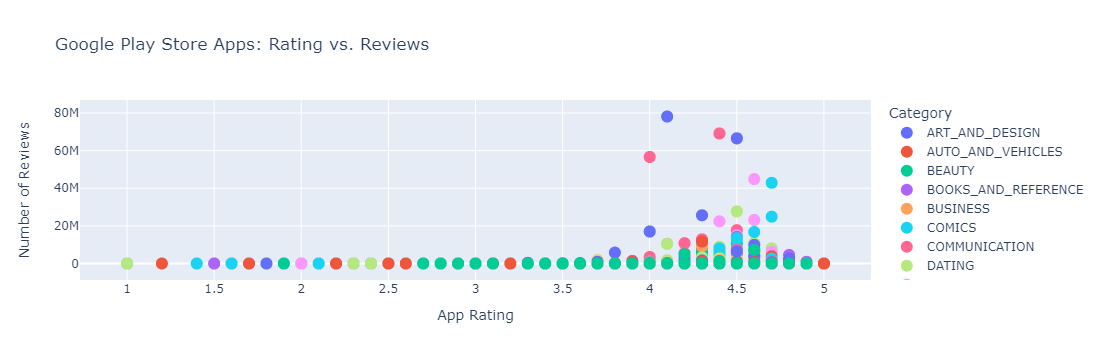

In [88]:
import pandas as pd
import plotly.express as px

data_path = 'googleplaystore.csv'  
data = pd.read_csv(data_path)

data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data.dropna(subset=['Rating', 'Reviews'], inplace=True)

# Create an interactive scatter plot
def create_interactive_plot():
    fig = px.scatter(data_frame=data, x='Rating', y='Reviews',
                     color='Category', hover_name='App',
                     title='Google Play Store Apps: Rating vs. Reviews',
                     labels={'Reviews': 'Number of Reviews', 'Rating': 'App Rating'},
                     hover_data=['Category', 'Installs'])  # Additional data to show on hover
                     
    fig.update_traces(marker=dict(size=12),
                      selector=dict(mode='markers'))
    fig.show()

create_interactive_plot()


In [ ]:
7.Filter

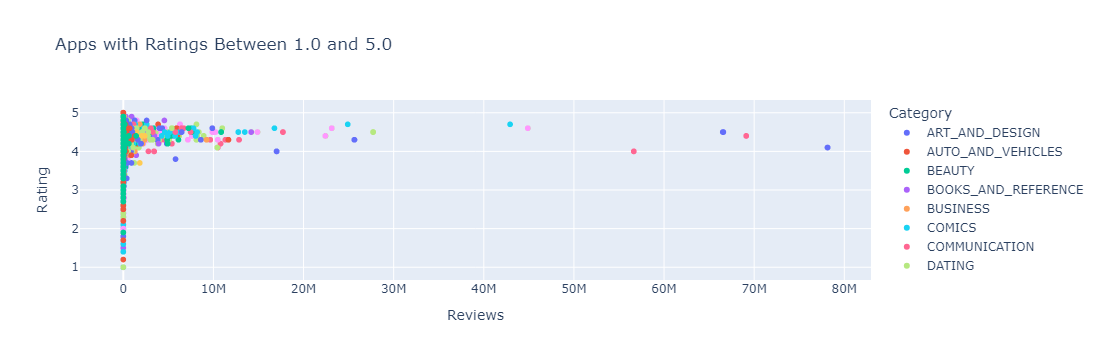

interactive(children=(FloatSlider(value=1.0, description='Min Rating:', max=5.0, min=1.0), FloatSlider(value=5…

In [89]:
import pandas as pd
import plotly.express as px
from ipywidgets import interactive, widgets

# Load the dataset
data_path = 'googleplaystore.csv'  
data = pd.read_csv(data_path)

# Convert 'Reviews' to numeric and ensure 'Rating' is suitable for filtering
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data.dropna(subset=['Rating', 'Reviews'], inplace=True)

# Function to filter data and update plot based on the selected rating range
def filter_apps_by_rating(min_rating, max_rating):
    filtered_data = data[(data['Rating'] >= min_rating) & (data['Rating'] <= max_rating)]
    
    fig = px.scatter(filtered_data, x='Reviews', y='Rating', color='Category', hover_name='App',
                     title=f'Apps with Ratings Between {min_rating} and {max_rating}')
    fig.show()

# Create interactive widgets for the minimum and maximum rating
min_rating_slider = widgets.FloatSlider(value=data['Rating'].min(), min=data['Rating'].min(), max=data['Rating'].max(), step=0.1, description='Min Rating:')
max_rating_slider = widgets.FloatSlider(value=data['Rating'].max(), min=data['Rating'].min(), max=data['Rating'].max(), step=0.1, description='Max Rating:')

# Display interactive plot with filters
interactive_plot = interactive(filter_apps_by_rating, min_rating=min_rating_slider, max_rating=max_rating_slider)
output = interactive_plot.children[-1]
output.layout.height = '500px'  # Adjust the height of the plot
display(interactive_plot)


In [ ]:
8.Connect

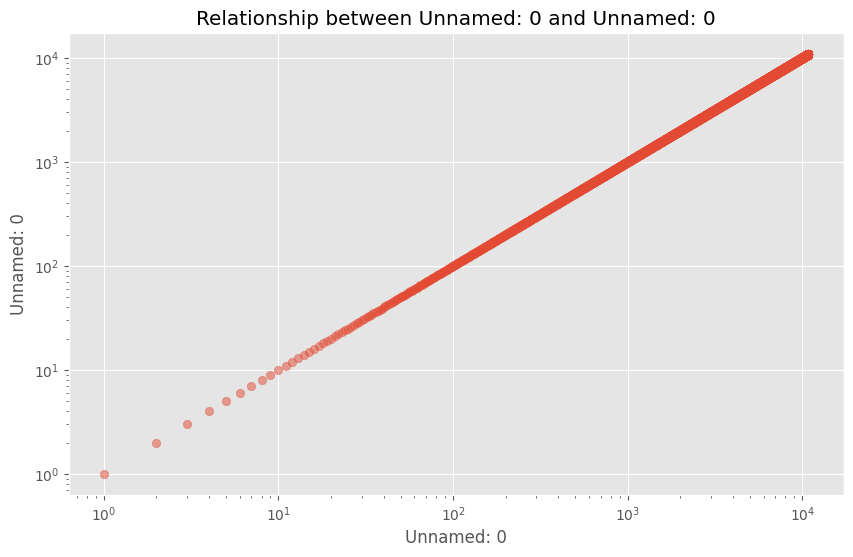

interactive(children=(Dropdown(description='column1', options=('Unnamed: 0', 'Rating', 'Reviews'), value='Unna…

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown
import numpy as np

data_path = 'googleplaystore.csv' 
data = pd.read_csv(data_path)

# Convert 'Reviews' to numeric
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

# Define a function to plot the relationship between two selected columns
def plot_relationship(column1, column2):
    plt.figure(figsize=(10, 6))
    # Assuming non-numeric columns and NaN values are handled appropriately
    plt.scatter(data[column1], data[column2], alpha=0.5)
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title(f'Relationship between {column1} and {column2}')
    plt.xscale('log') if data[column1].dtype == 'float64' or data[column1].dtype == 'int64' else None
    plt.yscale('log') if data[column2].dtype == 'float64' or data[column2].dtype == 'int64' else None
    plt.grid(True)
    plt.show()

# Create dropdowns for selecting columns
column1_dropdown = Dropdown(options=data.select_dtypes(include=np.number).columns.tolist())
column2_dropdown = Dropdown(options=data.select_dtypes(include=np.number).columns.tolist())

# Display the interactive plot
interact(plot_relationship, column1=column1_dropdown, column2=column2_dropdown);
